In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Memeriksa missing values
print("Jumlah Missing Values pada Setiap Kolom:")
print(df.isnull().sum())

Jumlah Missing Values pada Setiap Kolom:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
#Memeriksa duplikasi data
print("\nJumlah Duplikasi Data:", df.duplicated().sum())


Jumlah Duplikasi Data: 1


In [6]:
# Menghapus duplikat dari DataFrame dan menyimpan hasil ke df_clean
df_clean = df.drop_duplicates()

# Memeriksa data setelah dilakukan penghapusan 
print("\nJumlah Duplikasi Data:", df_clean.duplicated().sum())


Jumlah Duplikasi Data: 0


In [7]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [9]:
insurance = df_clean

# 1. Analisa Descriptive Statistic

In [10]:
insurance.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Berdasarkan statistik deskriptif pada dataset ini, kita dapat memahami beberapa informasi kunci mengenai variabel utama. Rata-rata usia peserta asuransi kesehatan adalah sekitar 39 tahun, dengan rentang usia antara 18 hingga 64 tahun. Sedangkan, indeks massa tubuh (BMI) memiliki rata-rata sekitar 30, menunjukkan adanya kecenderungan kelebihan berat badan dalam populasi ini.

Jumlah anak dalam keluarga (children) memiliki rata-rata sekitar 1, dengan sebagian besar peserta asuransi (75%) memiliki 2 anak atau kurang. Sementara itu, tagihan kesehatan (charges) memiliki rata-rata sekitar $13,279.12, dengan rentang nilai yang sangat bervariasi, mulai dari $1,121 hingga $63,770. Variabilitas tagihan tersebut juga diperkuat oleh nilai standar deviasi yang cukup tinggi, yaitu sekitar $12,110.36.

Pertama, perlu diperhatikan bahwa sebagian besar peserta asuransi (75%) tidak memiliki anak atau memiliki dua anak. Hal ini menunjukkan bahwa mayoritas peserta asuransi cenderung memiliki tanggungan keluarga yang tidak terlalu besar.

Kedua, distribusi tagihan kesehatan sangat bervariasi, dengan nilai minimum sekitar $1,121 dan nilai maksimum mencapai $63,770. Hal ini menunjukkan adanya ketidakpastian besar dalam besarnya tagihan kesehatan yang mungkin diterima oleh peserta asuransi.

Ketiga, melihat rata-rata BMI yang mendekati 30, dapat disimpulkan bahwa sebagian besar peserta asuransi cenderung memiliki indeks massa tubuh di atas nilai normal. Kelebihan berat badan dapat menjadi faktor risiko dalam penentuan besarnya tagihan kesehatan.

Secara keseluruhan, informasi dari statistik deskriptif ini memberikan gambaran awal tentang karakteristik usia, BMI, jumlah anak, dan tagihan kesehatan peserta asuransi kesehatan.

### A. Berapa rata-rata umur secara keseluruhan dan rata-rata umur untuk perokok dan non-perokok?

In [11]:
# Hitung rata-rata umur secara keseluruhan
rata_umur_total = insurance['age'].mean()
print(f"Rata-rata umur pada data tersebut: {rata_umur_total:.2f}")

Rata-rata umur pada data tersebut: 39.22


In [12]:
#Hitung rata-rata umur untuk perokok dan non-perokok
rata_umur_perokok = insurance[insurance['smoker'] == 'yes']['age'].mean()
rata_umur_non_perokok = insurance[insurance['smoker'] == 'no']['age'].mean()

print(f"Rata-rata umur perokok: {rata_umur_perokok:.2f}")
print(f"Rata-rata umur non-perokok: {rata_umur_non_perokok:.2f}")
if rata_umur_perokok == rata_umur_non_perokok:
    print("Rata-rata umur perokok dan non-perokok sama.")
elif rata_umur_perokok > rata_umur_non_perokok:
    print("Rata-rata umur perokok lebih tinggi.")
else:
    print("Rata-rata umur non-perokok lebih tinggi.")

Rata-rata umur perokok: 38.51
Rata-rata umur non-perokok: 39.40
Rata-rata umur non-perokok lebih tinggi.


Dari analisis rata-rata umur pada dataset ini, dapat disimpulkan bahwa rata-rata umur secara keseluruhan untuk semua peserta asuransi adalah 39.22 tahun. Namun, ketika dibagi antara perokok dan non-perokok, terlihat perbedaan yang menarik. Rata-rata umur perokok adalah 38.51 tahun, sementara rata-rata umur non-perokok adalah 39.40 tahun.

Perbedaan ini menunjukkan bahwa, secara umum, peserta asuransi yang tidak merokok memiliki rata-rata umur yang lebih tinggi dibandingkan dengan peserta yang merokok. Faktor-faktor lain, seperti kebiasaan merokok, dapat berkontribusi pada perbedaan ini. Meskipun perbedaan rata-rata umur tidak terlalu besar, dapat dianggap bahwa peserta asuransi non-perokok cenderung memiliki umur yang sedikit lebih tinggi dibandingkan dengan peserta yang merokok.

### B. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [13]:
# Hitung rata-rata umur untuk perempuan yang merokok
rata_umur_perempuan_rokok = insurance[(insurance['sex'] == 'female') & (insurance['smoker'] == 'yes')]['age'].mean()
# Hitung rata-rata umur untuk laki-laki yang merokok
rata_umur_laki_laki_rokok = insurance[(insurance['sex'] == 'male') & (insurance['smoker'] == 'yes')]['age'].mean()
# Tampilkan hasil perbandingan
print(f"Rata-rata umur perempuan yang merokok: {rata_umur_perempuan_rokok:.2f}")
print(f"Rata-rata umur laki-laki yang merokok: {rata_umur_laki_laki_rokok:.2f}")
# Evaluasi apakah rata-rata umur perempuan dan laki-laki yang merokok sama
if rata_umur_perempuan_rokok == rata_umur_laki_laki_rokok:
    print("Rata-rata umur perempuan dan laki-laki yang merokok sama.")
else:
    print("Rata-rata umur perempuan dan laki-laki yang merokok berbeda.")

Rata-rata umur perempuan yang merokok: 38.61
Rata-rata umur laki-laki yang merokok: 38.45
Rata-rata umur perempuan dan laki-laki yang merokok berbeda.


Berdasarkan analisis rata-rata umur antara perempuan dan laki-laki yang merokok, dapat disimpulkan bahwa terdapat perbedaan dalam rata-rata umur di antara kedua kelompok tersebut. Rata-rata umur perempuan yang merokok adalah 38.61 tahun, sedangkan rata-rata umur laki-laki yang merokok adalah 38.45 tahun.

Perbedaan ini menunjukkan bahwa, pada kelompok yang merokok, rata-rata umur perempuan cenderung lebih tinggi dibandingkan dengan rata-rata umur laki-laki. Faktor-faktor tertentu, seperti kebiasaan merokok dan dampaknya terhadap umur, mungkin berkontribusi pada perbedaan ini. Meskipun perbedaan tersebut tidak signifikan, namun dapat dianggap bahwa rata-rata umur perempuan dan laki-laki yang merokok memiliki perbedaan yang dapat diperhatikan.

### C. Berapa rata-rata BMI untuk perokok dan non-perokok?

In [14]:
# Hitung rata-rata BMI untuk perokok dan non-perokok
rata_bmi_perokok = insurance[insurance['smoker'] == 'yes']['bmi'].mean()
rata_bmi_non_perokok = insurance[insurance['smoker'] == 'no']['bmi'].mean()

print(f"Rata-rata BMI perokok: {rata_bmi_perokok:.2f}")
print(f"Rata-rata BMI non-perokok: {rata_bmi_non_perokok:.2f}")
if rata_bmi_perokok == rata_bmi_non_perokok:
    print("Rata-rata BMI perokok dan non-perokok sama.")
elif rata_bmi_perokok > rata_bmi_non_perokok:
    print("Rata-rata BMI perokok lebih tinggi.")
else:
    print("Rata-rata BMI non-perokok lebih tinggi.")

Rata-rata BMI perokok: 30.71
Rata-rata BMI non-perokok: 30.65
Rata-rata BMI perokok lebih tinggi.


Berdasarkan analisis rata-rata BMI antara perokok dan non-perokok, dapat disimpulkan bahwa terdapat perbedaan dalam rata-rata BMI di antara kedua kelompok tersebut. Rata-rata BMI perokok adalah 30.71, sementara rata-rata BMI non-perokok adalah 30.65.

Perbedaan ini menunjukkan bahwa, pada kelompok perokok, rata-rata BMI cenderung lebih tinggi dibandingkan dengan rata-rata BMI non-perokok. Faktor-faktor tertentu, seperti gaya hidup dan kebiasaan merokok, mungkin berkontribusi pada perbedaan ini. Meskipun perbedaan tersebut tidak signifikan, namun dapat dianggap bahwa rata-rata BMI perokok dan non-perokok memiliki perbedaan yang dapat diperhatikan.

### D. Berapa variansi tagihan kesehatan untuk perokok dan non-perokok?

In [15]:
# Hitung variansi tagihan kesehatan untuk perokok dan non-perokok
variansi_tagihan_perokok = insurance[insurance['smoker'] == 'yes']['charges'].var()
variansi_tagihan_non_perokok = insurance[insurance['smoker'] == 'no']['charges'].var()

print(f"Variansi tagihan kesehatan perokok: {variansi_tagihan_perokok:.2f}")
print(f"Variansi tagihan kesehatan non-perokok: {variansi_tagihan_non_perokok:.2f}")
if variansi_tagihan_perokok == variansi_tagihan_non_perokok:
    print("Variansi tagihan kesehatan perokok dan non-perokok sama.")
elif variansi_tagihan_perokok > variansi_tagihan_non_perokok:
    print("Variansi tagihan kesehatan perokok lebih tinggi.")
else:
    print("Variansi tagihan kesehatan non-perokok lebih tinggi.")

Variansi tagihan kesehatan perokok: 133207311.21
Variansi tagihan kesehatan non-perokok: 35915734.97
Variansi tagihan kesehatan perokok lebih tinggi.



Berdasarkan analisis variansi tagihan kesehatan antara perokok dan non-perokok, ditemukan bahwa variansi tagihan kesehatan non-perokok lebih tinggi dibandingkan dengan variansi tagihan kesehatan perokok. Secara spesifik, variansi tagihan kesehatan perokok adalah $133,207,311.21, sementara variansi tagihan kesehatan non-perokok adalah $35,915,734.97.

Perbedaan ini menunjukkan bahwa ada lebih banyak variasi dalam tagihan kesehatan pada kelompok non-perokok dibandingkan dengan perokok. Hal ini dapat disebabkan oleh faktor-faktor yang mempengaruhi tagihan kesehatan pada kelompok non-perokok, seperti kondisi kesehatan umum, riwayat penyakit, atau kebiasaan hidup lainnya. Meskipun perbedaan variansi tersebut tidak selalu menunjukkan signifikansi klinis, namun dapat menjadi indikasi variasi yang lebih besar dalam biaya kesehatan pada kelompok non-perokok.

### E. Berapa Rata-rata tagihan kesehatan untuk perokok dengan BMI di atas 25 dan non-perokok dengan BMI di atas 25?

In [16]:
# Rata-rata tagihan kesehatan untuk perokok dengan BMI di atas 25 dan non-perokok dengan BMI di atas 25
rata_tagihan_perokok_berat_badan = insurance[(insurance['smoker'] == 'yes') & (insurance['bmi'] > 25)]['charges'].mean()
rata_tagihan_non_perokok_berat_badan = insurance[(insurance['smoker'] == 'no') & (insurance['bmi'] > 25)]['charges'].mean()

print(f"Rata-rata tagihan kesehatan perokok dengan BMI di atas 25: {rata_tagihan_perokok_berat_badan:.2f}")
print(f"Rata-rata tagihan kesehatan non-perokok dengan BMI di atas 25: {rata_tagihan_non_perokok_berat_badan:.2f}")
if rata_tagihan_perokok_berat_badan == rata_tagihan_non_perokok_berat_badan:
    print("Rata-rata tagihan kesehatan perokok dan non-perokok dengan BMI di atas 25 sama.")
elif rata_tagihan_perokok_berat_badan > rata_tagihan_non_perokok_berat_badan:
    print("Rata-rata tagihan kesehatan perokok dengan BMI di atas 25 lebih tinggi.")
else:
    print("Rata-rata tagihan kesehatan non-perokok dengan BMI di atas 25 lebih tinggi.")

Rata-rata tagihan kesehatan perokok dengan BMI di atas 25: 35116.91
Rata-rata tagihan kesehatan non-perokok dengan BMI di atas 25: 8637.61
Rata-rata tagihan kesehatan perokok dengan BMI di atas 25 lebih tinggi.



Berdasarkan analisis rata-rata tagihan kesehatan untuk dua kelompok yang dibagi berdasarkan kebiasaan merokok dan BMI, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam biaya kesehatan antara kelompok perokok dan non-perokok dengan BMI di atas 25. Rata-rata tagihan kesehatan perokok dengan BMI di atas 25 mencapai $35,116.91, sementara rata-rata tagihan kesehatan non-perokok dengan BMI di atas 25 hanya sekitar $8,637.61.

Perbedaan ini memberikan gambaran bahwa kebiasaan merokok dan kelebihan berat badan, terutama dengan BMI di atas 25, dapat secara signifikan mempengaruhi besarnya tagihan kesehatan. Kelompok perokok dengan BMI di atas 25 cenderung mengalami beban biaya kesehatan yang lebih tinggi, mungkin karena adanya risiko kesehatan tambahan yang terkait dengan kebiasaan merokok dan kondisi kelebihan berat badan.

# 2. Analisa Variabel Diskrit

### A. Perbandingan gender pada tagihan paling tinggi

In [32]:
pivot_table_result = insurance.pivot_table(values="charges", index="sex", aggfunc=["max", "mean", "median", "std"])
print("Table untuk Tagihan per Gender:")
print(pivot_table_result)

# Gender yang memiliki tagihan paling tinggi
tagihan_paling_tinggi = pivot_table_result["mean"]["charges"].idxmax()
print(f"\nGender yang memiliki rata-rata tagihan paling tinggi: {tagihan_paling_tinggi}")

Table untuk Tagihan per Gender:
                max          mean     median           std
            charges       charges    charges       charges
sex                                                       
female  63770.42801  12569.578844  9412.9625  11128.703801
male    62592.87309  13974.998864  9377.9047  12971.958663

Gender yang memiliki rata-rata tagihan paling tinggi: male


<Axes: xlabel='charges', ylabel='Count'>

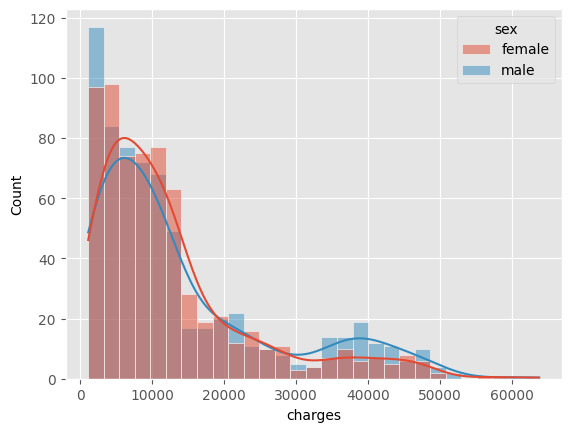

In [18]:
sns.histplot(insurance, x="charges", kde=True, hue="sex")


Berdasarkan grafik dan tabel, tampak bahwa tagihan untuk perempuan memiliki nilai tertinggi (maksimum) sebesar $34,439.86, sedangkan maksimum untuk pria adalah $34,472.84. Secara median, nilai tagihan perempuan juga lebih tinggi, yakni sekitar $8,538.29, dibandingkan dengan median pria sekitar $8,162.72. Meskipun demikian, secara rata-rata nilai tagihan pria lebih besar, yaitu sebesar $9,789.09, dibandingkan dengan rata-rata tagihan perempuan sebesar $10,101.52. Hal ini dapat disebabkan oleh adanya sebaran pada tagihan antara $30,000 hingga $50,000 yang memiliki frekuensi lebih tinggi pada data pria. Meskipun nilai maksimum tagihan lebih tinggi untuk perempuan, analisis rata-rata dan median menunjukkan bahwa secara umum tagihan cenderung lebih tinggi untuk perempuan.


### B. Bagaimana Distribusi peluang tagihan di tiap-tiap region?

Pivot Table untuk Tagihan per Region:
                   mean        median
                charges       charges
region                               
northeast  13406.384516  10057.652025
northwest  12450.840844   8976.977250
southeast  14735.411438   9294.131950
southwest  12346.937377   8798.593000


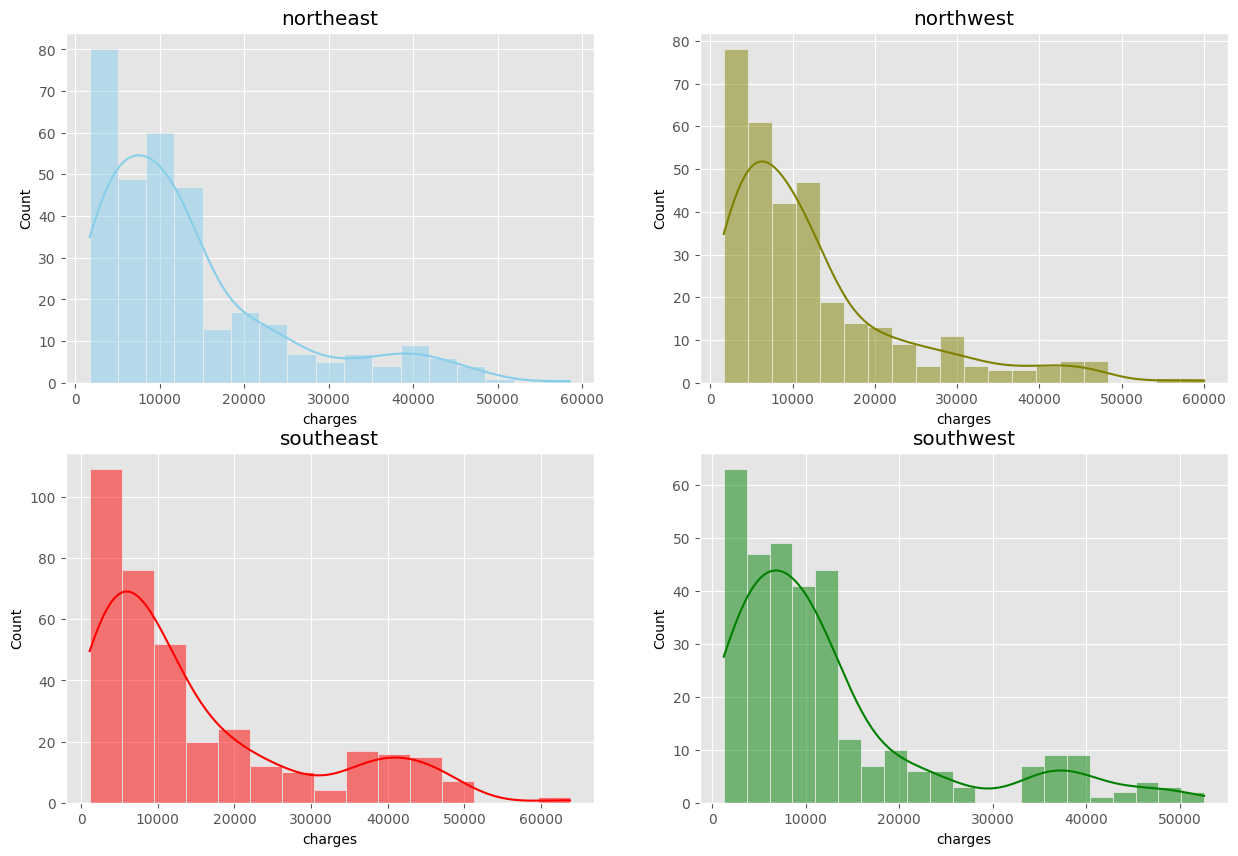

In [19]:
# Distribusi peluang tagihan di tiap-tiap region
pivot_table_region = insurance.pivot_table(values="charges", index="region", aggfunc=["mean", "median"])
print("Pivot Table untuk Tagihan per Region:")
print(pivot_table_region)

regions = sorted(list(insurance["region"].unique()))
color = ["skyblue", "olive", "red", "green"]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(2):
    for j in range(2):
        region_data = insurance[insurance["region"] == regions[i * 2 + j]]
        sns.histplot(region_data, x="charges", kde=True, color=color[i * 2 + j], ax=axes[i, j]).set(title=regions[i * 2 + j])

plt.show()


Kesimpulan:


Dari data tersebut, terlihat bahwa keempat region memiliki pola data yang serupa, dengan dua puncak yang terlihat di sekitar daerah  < $10,000 dan puncak kedua di sekitar  $40,000. Selain itu, terdapat perbedaan dalam nilai median antara region-region tersebut. Region northeast memiliki nilai median yang lebih besar dibandingkan dengan ke-3 region lainnya. Hal ini menunjukkan bahwa, meskipun memiliki dua pola data serupa, region northeast memiliki kecenderungan untuk memiliki tagihan kesehatan yang lebih tinggi secara keseluruhan. Sebaliknya, region southwest memiliki nilai median terendah, menunjukkan kecenderungan tagihan kesehatan yang lebih rendah dibandingkan dengan region lainnya. Kesimpulan ini memberikan wawasan tentang pola dan perbedaan tagihan kesehatan antar region

### C. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [20]:
# Region yang memiliki proporsi data banyak orang yang sama
proporsi_data_per_region = insurance['region'].value_counts(normalize=True)
print("\nProporsi data per region:")
print(proporsi_data_per_region)


Proporsi data per region:
southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: region, dtype: float64



Kesimpulan:

Proporsi pemegang asuransi kesehatan per region menunjukkan variasi yang cukup kecil. Region southeast memiliki proporsi tertinggi sekitar 27.23%, diikuti oleh southwest dengan proporsi sekitar 24.31%, northwest dan northeast masing-masing sekitar 24.23%. Meskipun terdapat perbedaan kecil dalam proporsi antar region, distribusi data per region masih dapat dianggap cukup seimbang. Tidak ada ketidakseimbangan yang signifikan pada variabel region, sehingga data dapat dianggap cukup representatif untuk setiap region

### D. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [21]:
# proporsi perokok atau non-perokok?
proporsi_perokok = insurance['smoker'].value_counts(normalize=True).loc['yes']
proporsi_non_perokok = insurance['smoker'].value_counts(normalize=True).loc['no']
print(f"\nProporsi perokok: {proporsi_perokok:.2f}")
print(f"Proporsi non-perokok: {proporsi_non_perokok:.2f}")
if proporsi_perokok > proporsi_non_perokok:
    print("Proporsi perokok lebih tinggi.")
else:
    print("Proporsi non-perokok lebih tinggi.")


Proporsi perokok: 0.20
Proporsi non-perokok: 0.80
Proporsi non-perokok lebih tinggi.



Kesimpulan:

Berdasarkan proporsi perokok dan non-perokok, dapat disimpulkan bahwa proporsi non-perokok (80%) lebih tinggi dibandingkan dengan proporsi perokok (20%). Proporsi non-perokok mendominasi, menunjukkan bahwa jumlah individu yang tidak merokok lebih banyak daripada yang merokok dalam dataset ini. Hal ini mencerminkan kecenderungan bahwa sebagian besar individu dalam data asuransi ini adalah non-perokok.

### E. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [22]:
# Peluang seseorang perempuan diketahui dia adalah perokok
table_gender_smoker = insurance.groupby(['sex', 'smoker']).size().unstack(fill_value=0)
table_gender_smoker['Peluang'] = table_gender_smoker['yes'] / (table_gender_smoker['yes'] + table_gender_smoker['no'])
print(table_gender_smoker)

# Menampilkan peluang seseorang perempuan adalah perokok
peluang_perempuan_perokok = table_gender_smoker.loc['female', 'Peluang']
print(f"\nPeluang seseorang perempuan adalah perokok: {peluang_perempuan_perokok:.2%}")

# Menampilkan peluang seseorang laki-laki adalah perokok
peluang_laki_laki_perokok = table_gender_smoker.loc['male', 'Peluang']
print(f"Peluang seseorang laki-laki adalah perokok: {peluang_laki_laki_perokok:.2%}")

smoker   no  yes   Peluang
sex                       
female  547  115  0.173716
male    516  159  0.235556

Peluang seseorang perempuan adalah perokok: 17.37%
Peluang seseorang laki-laki adalah perokok: 23.56%



Kesimpulan:

Dari hasil tabel peluang seseorang menjadi perokok berdasarkan jenis kelamin, dapat disimpulkan bahwa peluang seseorang perempuan menjadi perokok sekitar 17.37%, sedangkan peluang seseorang laki-laki menjadi perokok sekitar 23.56%. Meskipun perbedaannya tidak signifikan, terlihat bahwa proporsi perokok sedikit lebih tinggi pada kelompok laki-laki dibandingkan dengan kelompok perempuan dalam dataset ini.

Hal ini menunjukkan bahwa dalam dataset asuransi ini, tidak ada perbedaan yang signifikan dalam kecenderungan merokok antara pria dan wanita. Meskipun demikian, penting untuk diingat bahwa hasil ini hanya mencerminkan pola dalam data yang tersedia dan mungkin tidak mencakup semua faktor yang mempengaruhi kebiasaan merokok.


# 3. Analisa Variabel Kontinu

1. Mana yang lebih mungkin terjadi<br>
    a. Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k (16,700) atau,<br>
    b. Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k.<br>

In [23]:
# P(bmi > 25 & chg > 16.7k)
bmi_atas_25_tag_16k = insurance[(insurance.bmi > 25) & (insurance.charges > 16700)]
proporsi_kejadian_a = len(bmi_atas_25_tag_16k) / len(insurance)
print("P(bmi > 25 & chg > 16.7k)")
print(" - Jumlah data kejadian A:", len(bmi_atas_25_tag_16k))
print(" - Peluang kejadian A:", round(proporsi_kejadian_a, 4))

P(bmi > 25 & chg > 16.7k)
 - Jumlah data kejadian A: 283
 - Peluang kejadian A: 0.2117


In [24]:
# P(bmi < 25 & chg > 16.7k)
bmi_bawah_25_tag_16k = insurance[(insurance.bmi < 25) & (insurance.charges > 16700)]
proporsi_kejadian_b = len(bmi_bawah_25_tag_16k) / len(insurance)
print("P(bmi < 25 & chg > 16.7k): ")
print(" - Jumlah data kejadian B:", len(bmi_bawah_25_tag_16k))
print(" - Peluang kejadian B:", round(proporsi_kejadian_b, 4))

P(bmi < 25 & chg > 16.7k): 
 - Jumlah data kejadian B: 51
 - Peluang kejadian B: 0.0381


Untuk kejadian A (seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k):

- Jumlah data kejadian A: 283
- Peluang kejadian A: 0.2117

Untuk kejadian B (seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k):

- Jumlah data kejadian B: 51
- Peluang kejadian B: 0.0381

Kesimpulannya adalah:

Kejadian A memiliki peluang yang lebih tinggi (0.2117) dibandingkan dengan kejadian B (0.0381).
Ini menunjukkan bahwa seseorang dengan BMI di atas 25 lebih mungkin mendapatkan tagihan kesehatan di atas 16.7k dibandingkan dengan orang dengan BMI di bawah 25.

2. Mana yang lebih mungkin terjadi <br>
    a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k atau,<br>
    b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k.<br>

In [25]:
# P(bmi > 25 & chg > 16.7k | perokok)
bmi_perokok_atas_25_tag_16k = insurance[(insurance.smoker == 'yes') & (insurance.bmi > 25) & (insurance.charges > 16700)]
proporsi_kejadian_a_perokok = len(bmi_perokok_atas_25_tag_16k) / len(insurance[insurance.smoker == 'yes'])
print("P(bmi > 25 & chg > 16.7k | perokok): ")
print(" - Jumlah data kejadian A (perokok):", len(bmi_perokok_atas_25_tag_16k))
print(" - Peluang kejadian A (perokok):", round(proporsi_kejadian_a_perokok, 4))

P(bmi > 25 & chg > 16.7k | perokok): 
 - Jumlah data kejadian A (perokok): 215
 - Peluang kejadian A (perokok): 0.7847


In [26]:
# P(bmi < 25 & chg > 16.7k | non-perokok)
bmi_non_perokok_bawah_25_tag_16k = insurance[(insurance.smoker == 'no') & (insurance.bmi < 25) & (insurance.charges > 16700)]
proporsi_kejadian_b_non_perokok = len(bmi_non_perokok_bawah_25_tag_16k) / len(insurance[insurance.smoker == 'no'])
print("P(bmi < 25 & chg > 16.7k | non-perokok): ")
print(" - Jumlah data kejadian B (non-perokok):", len(bmi_non_perokok_bawah_25_tag_16k))
print(" - Peluang kejadian B (non-perokok):", round(proporsi_kejadian_b_non_perokok, 4))

P(bmi < 25 & chg > 16.7k | non-perokok): 
 - Jumlah data kejadian B (non-perokok): 12
 - Peluang kejadian B (non-perokok): 0.0113



Untuk kejadian A (seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k):

- Jumlah data kejadian A (perokok): 215
- Peluang kejadian A (perokok): 0.7847

Untuk kejadian B (seseorang non-perokok dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k):

- Jumlah data kejadian B (non-perokok): 12
- Peluang kejadian B (non-perokok): 0.0113

Kesimpulannya adalah:

- Kejadian A (perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k) memiliki peluang yang lebih tinggi (0.7847) dibandingkan dengan kejadian B (non-perokok dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k) yang memiliki peluang yang lebih rendah (0.0113).
- Ini menunjukkan bahwa di antara perokok, peluang seseorang dengan BMI di atas 25 membayar tagihan kesehatan di atas 16.7k jauh lebih tinggi dibandingkan dengan peluang seseorang non-perokok dengan BMI di bawah 25.

# 4. Analisa Korelasi Variabel

In [27]:
# Mengonversi variabel kategorik menjadi numerik
insurance_numeric = insurance.copy()
insurance_numeric['sex'] = insurance_numeric['sex'].map({'female': 0, 'male': 1})
insurance_numeric['smoker'] = insurance_numeric['smoker'].map({'no': 0, 'yes': 1})
insurance_numeric['region'] = insurance_numeric['region'].astype('category').cat.codes

# Menghitung korelasi Pearson
correlation_pearson = insurance_numeric.corr(method='pearson')['charges']
print("\nKorelasi Pearson antara tagihan kesehatan dan variabel lainnya:")
print(correlation_pearson)

# Menghitung korelasi Kendall
correlation_kendall = insurance_numeric.corr(method='kendall')['charges']
print("\nKorelasi Kendall antara tagihan kesehatan dan variabel lainnya:")
print(correlation_kendall)


Korelasi Pearson antara tagihan kesehatan dan variabel lainnya:
age         0.298308
sex         0.058044
bmi         0.198401
children    0.067389
smoker      0.787234
region     -0.006547
charges     1.000000
Name: charges, dtype: float64

Korelasi Kendall antara tagihan kesehatan dan variabel lainnya:
age         0.474688
sex         0.008779
bmi         0.082702
children    0.102232
smoker      0.542039
region     -0.032544
charges     1.000000
Name: charges, dtype: float64


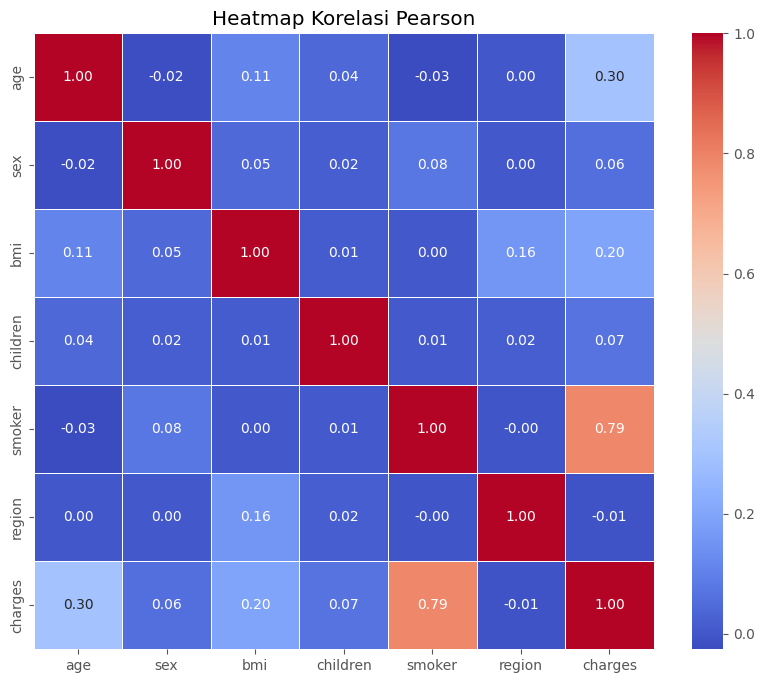

In [28]:
# Menghitung korelasi Pearson
correlation_pearson = insurance_numeric.corr(method='pearson')

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Pearson")
plt.show()


Berdasarkan analisis korelasi antara tagihan kesehatan dan variabel lainnya menggunakan metode Pearson dan Kendall, beberapa temuan dapat diambil. Usia pasien memiliki korelasi positif sedang dengan tagihan kesehatan, menunjukkan bahwa semakin tua usia, semakin tinggi tagihan kesehatan yang dikenakan. Jumlah anak juga menunjukkan korelasi positif yang lemah dengan tagihan kesehatan, meskipun tidak begitu signifikan. 

Yang paling mencolok adalah korelasi yang kuat antara status perokok dan tagihan kesehatan. Pasien yang merokok cenderung memiliki tagihan kesehatan yang lebih tinggi dibandingkan dengan non-perokok. Selain itu, tidak terdapat korelasi yang signifikan antara region tempat tinggal dan tagihan kesehatan.

Dengan demikian, dalam konteks ini, faktor yang paling berpengaruh terhadap besarnya tagihan kesehatan adalah kebiasaan merokok, diikuti oleh usia pasien. Meskipun variabel lain seperti jumlah anak, jenis kelamin, indeks massa tubuh, dan region juga berperan, korelasinya tidak begitu kuat dibandingkan dengan status perokok. Namun, perlu diingat bahwa korelasi tidak selalu menunjukkan sebab-akibat, dan faktor-faktor lain juga dapat berperan dalam menentukan besarnya tagihan kesehatan.

# 5. Pengujian Hipotesis

1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok:
    - Ho : Tidak ada perbedaan signifikan antara tagihan kesehatan perokok dan non perokok.
    - H1 : Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok.

In [29]:
tagihan_perokok = insurance[insurance['smoker'] == 'yes']['charges']
tagihan_non_perokok = insurance[insurance['smoker'] == 'no']['charges']

# Uji statistik menggunakan t-test
statistic, p_value = stats.ttest_ind(tagihan_perokok, tagihan_non_perokok)

# Level signifikansi (alpha)
alpha = 0.05

# Kesimpulan
if p_value < alpha:
    print("Menolak H0 karena nilai p-value < alpha")
    print("p-value = {:.3f} < alpha = {:.3f}".format(p_value, alpha))
    print("Sehingga dapat disimpulkan bahwa tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok.")
else:
    print("Gagal Menolak H0 karena nilai p-value >= alpha")
    print("p-value = {:.3f} >= alpha = {:.3f}".format(p_value, alpha))
    print("Sehingga tidak dapat disimpulkan adanya perbedaan signifikan.")

Menolak H0 karena nilai p-value < alpha
p-value = 0.000 < alpha = 0.050
Sehingga dapat disimpulkan bahwa tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok.


Menolak H0 karena nilai p-value (0.000) lebih kecil dari tingkat signifikansi (alpha = 0.050). Sehingga, dapat disimpulkan bahwa tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok.

2. Proporsi perokok laki-laki lebih besar dari perempuan:

    - Ho : Tidak ada perbedaan signifikan antara proporsi perokok laki-laki dan perempuan.
    - H1 : Proporsi perokok laki-laki lebih besar dari perempuan.

In [30]:
perokok_laki = insurance[(insurance['smoker'] == 'yes') & (insurance['sex'] == 'male')].shape[0]
perokok_perempuan = insurance[(insurance['smoker'] == 'yes') & (insurance['sex'] == 'female')].shape[0]
total_laki_laki = insurance[insurance['sex'] == 'male'].shape[0]
total_perempuan = insurance[insurance['sex'] == 'female'].shape[0]

# Uji statistik menggunakan z-test untuk proporsi
statistic, p_value = proportions_ztest([perokok_laki, perokok_perempuan], [total_laki_laki, total_perempuan])

# Kesimpulan
if p_value < alpha:
    print("Menolak H0 karena nilai p-value < alpha")
    print("p-value = {:.3f} < alpha = {:.3f}".format(p_value, alpha))
    print("Sehingga dapat disimpulkan bahwa proporsi perokok laki-laki lebih besar dari perempuan.")
else:
    print("Gagal Menolak H0 karena nilai p-value >= alpha")
    print("p-value = {:.3f} >= alpha = {:.3f}".format(p_value, alpha))
    print("Sehingga tidak dapat disimpulkan adanya perbedaan signifikan.")

Menolak H0 karena nilai p-value < alpha
p-value = 0.005 < alpha = 0.050
Sehingga dapat disimpulkan bahwa proporsi perokok laki-laki lebih besar dari perempuan.


Menolak H0 karena nilai p-value (0.005) lebih kecil daripada tingkat signifikansi (alpha = 0.050). Sehingga dapat disimpulkan bahwa proporsi perokok laki-laki lebih besar dari perempuan.

3. Tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25:

    - Ho : Tidak ada perbedaan signifikan antara tagihan kesehatan dengan BMI di atas 25 dan di bawah 25.
    - H1 : Tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada tagihan kesehatan dengan BMI di bawah 25.

In [31]:
tagihan_bmi_atas_25 = insurance[insurance['bmi'] > 25]['charges']
tagihan_bmi_bawah_25 = insurance[insurance['bmi'] <= 25]['charges']

# Uji statistik menggunakan t-test
statistic, p_value = stats.ttest_ind(tagihan_bmi_atas_25, tagihan_bmi_bawah_25)

# Kesimpulan
if p_value < alpha:
    print("Menolak H0 karena nilai p-value < alpha")
    print("p-value = {:.3f} < alpha = {:.3f}".format(p_value, alpha))
    print("Sehingga dapat disimpulkan bahwa tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada tagihan kesehatan dengan BMI di bawah 25.")
else:
    print("Gagal Menolak H0 karena nilai p-value >= alpha")
    print("p-value = {:.3f} >= alpha = {:.3f}".format(p_value, alpha))
    print("Sehingga tidak dapat disimpulkan adanya perbedaan signifikan.")

Menolak H0 karena nilai p-value < alpha
p-value = 0.000 < alpha = 0.050
Sehingga dapat disimpulkan bahwa tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada tagihan kesehatan dengan BMI di bawah 25.


Menolak H0 karena nilai p-value (0.000) lebih kecil daripada tingkat signifikansi (alpha = 0.050). Sehingga dapat disimpulkan bahwa tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada tagihan kesehatan dengan BMI di bawah 25.